In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
from keras.layers import Dense,Input

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/MyDrive/Covid 19 News Classification/Data/raw_data_v2.csv", engine='python')
    return data

In [12]:
tweet_df = load_data()
tweet_df.head(2)

,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...


In [13]:
tweet_df['covid_lemmatized'] = tweet_df['covid_lemmatized'].str.lower()

In [14]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import time
from keras import metrics
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
X = tweet_df['covid_lemmatized']
y = tweet_df['Covid']

In [17]:
X.shape,y.shape

((4072,), (4072,))

In [20]:
max_features=30000
max_len=56
sequence_input = Input(shape=(max_len, ))
embed_size=100

In [22]:
import keras
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks

from keras.preprocessing import text, sequence

In [23]:
tokenizer = text.Tokenizer(num_words = max_features,lower = True
)

tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)
X=sequence.pad_sequences(X,maxlen=max_len)

In [24]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=3245 (50.000%)
Class=0, n=3245 (50.000%)


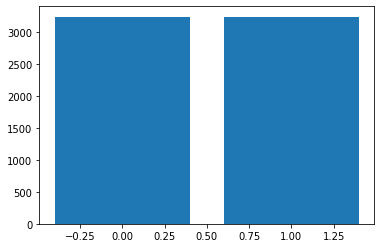

In [25]:
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [27]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import time
from keras import metrics
from tensorflow.keras.preprocessing.text import one_hot

In [28]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []

for train, test in kfold.split(X,y):
      model = Sequential()
      model.add(layers.Embedding(max_features, embed_size, input_length=max_len))
      model.add(layers.Conv1D(128,5, activation='relu'))
      model.add(layers.GlobalMaxPooling1D())
      model.add(layers.Dense(10, activation='relu'))
      model.add(layers.Dense(2, activation='softmax'))
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
      #model2.add(Dense(1,activation='relu'))
      adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
      model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
      # Fit the model
      history = model.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=64)

Epoch 1/5
82/82 [==============================] - 6s 69ms/step - loss: 0.4462 - accuracy: 0.7974 - val_loss: 0.1935 - val_accuracy: 0.9314
Epoch 2/5
82/82 [==============================] - 5s 67ms/step - loss: 0.1267 - accuracy: 0.9549 - val_loss: 0.1073 - val_accuracy: 0.9607
Epoch 3/5
82/82 [==============================] - 5s 67ms/step - loss: 0.0210 - accuracy: 0.9944 - val_loss: 0.1232 - val_accuracy: 0.9707
Epoch 4/5
82/82 [==============================] - 5s 66ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1509 - val_accuracy: 0.9607
Epoch 5/5
82/82 [==============================] - 5s 66ms/step - loss: 3.6599e-04 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9646
Epoch 1/5
82/82 [==============================] - 6s 68ms/step - loss: 0.4664 - accuracy: 0.7720 - val_loss: 0.2293 - val_accuracy: 0.9052
Epoch 2/5
82/82 [==============================] - 5s 67ms/step - loss: 0.1933 - accuracy: 0.9224 - val_loss: 0.1059 - val_accuracy: 0.9661
Epoch 3/5
82/82 

In [29]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.418254,0.811441,0.165981,0.941448
1,0.103153,0.964176,0.089732,0.969183
2,0.013822,0.996726,0.099729,0.969954
3,0.001380,0.999807,0.111626,0.971495
4,0.000292,1.000000,0.116782,0.971495


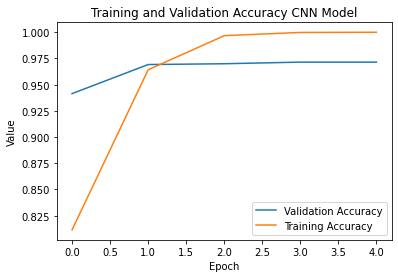

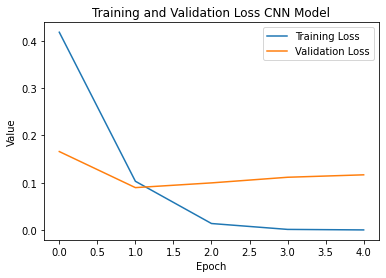

In [30]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Accuracy CNN Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Loss CNN Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [31]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9714946070878274

In [32]:
y_score = model.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [33]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


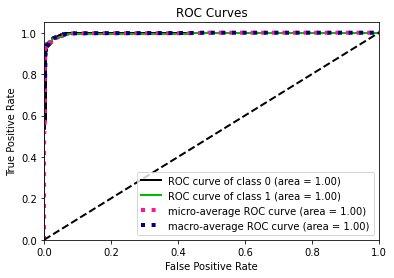

In [34]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       621
           1       0.97      0.97      0.97       677

    accuracy                           0.97      1298
   macro avg       0.97      0.97      0.97      1298
weighted avg       0.97      0.97      0.97      1298



In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.971
Confusion matrix, without normalization


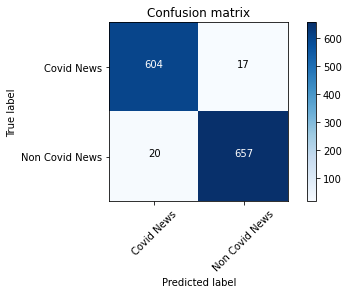

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Covid News', 'Non Covid News'])